# Homework 3 Dataset Exploration
### Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Import dataset from csv
Data is imported from local folder 'dataset' (not visible on GitHub)

In [2]:
# Import dataset
metrics = pd.read_csv('dataset/code_metrics_bugs.csv')
metrics.head()

,Unnamed: 0,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs _x,nonTrivialBugs _x,majorBugs _x,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,_y.1
0,0,org::eclipse::jdt::internal::core::search::ind...,3,2,0,0,0,0,0,0,...,1.0,5,34.0,20.0,0,0,0,0,0,
1,1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,0,0,0,...,2.0,1,1.0,1.0,0,0,0,0,0,
2,2,org::eclipse::jdt::internal::compiler::ast::AS...,55,48,6,4,2,1,0,0,...,3.0,19,156.0,176.0,1,0,0,0,0,
3,3,org::eclipse::jdt::internal::compiler::lookup:...,3,3,0,0,0,0,0,0,...,0.0,4,18.0,12.0,0,0,0,0,0,
4,4,org::eclipse::jdt::internal::eval::CodeSnippet...,15,13,1,1,0,0,0,0,...,7.0,1,174.0,115.0,0,0,0,0,0,


### Preliminary data cleaning
Looks like we have an unnecessary index column and a classname column (identifier) that we can drop from the data.

In [3]:
metrics = metrics.drop(metrics.columns[[0, 1]], axis=1)
metrics.head()

,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs _x,nonTrivialBugs _x,majorBugs _x,criticalBugs _x,highPriorityBugs _x,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,_y.1
0,3,2,0,0,0,0,0,0,0,0,...,1.0,5,34.0,20.0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,...,2.0,1,1.0,1.0,0,0,0,0,0,
2,55,48,6,4,2,1,0,0,0,0,...,3.0,19,156.0,176.0,1,0,0,0,0,
3,3,3,0,0,0,0,0,0,0,0,...,0.0,4,18.0,12.0,0,0,0,0,0,
4,15,13,1,1,0,0,0,0,0,0,...,7.0,1,174.0,115.0,0,0,0,0,0,


Looking at the columns in the dataset, we might have a couple duplicates. Lets check if these columns are equal and drop some if necessary.

In [4]:
# Print dataframe columns
metrics.columns

Index(['numberOfBugsFoundUntil:', 'numberOfNonTrivialBugsFoundUntil:',
       'numberOfMajorBugsFoundUntil:', 'numberOfCriticalBugsFoundUntil:',
       'numberOfHighPriorityBugsFoundUntil:', 'bugs _x', 'nonTrivialBugs _x',
       'majorBugs _x', 'criticalBugs _x', 'highPriorityBugs _x', '_x',
       'numberOfVersionsUntil:', 'numberOfFixesUntil:',
       'numberOfRefactoringsUntil:', 'numberOfAuthorsUntil:',
       'linesAddedUntil:', 'maxLinesAddedUntil:', 'avgLinesAddedUntil:',
       'linesRemovedUntil:', 'maxLinesRemovedUntil:', 'avgLinesRemovedUntil:',
       'codeChurnUntil:', 'maxCodeChurnUntil:', 'avgCodeChurnUntil:',
       'ageWithRespectTo:', 'weightedAgeWithRespectTo:', 'bugs _y',
       'nonTrivialBugs _y', 'majorBugs _y', 'criticalBugs _y',
       'highPriorityBugs _y', '_y', 'CvsEntropy', 'CvsWEntropy',
       'CvsLinEntropy', 'CvsLogEntropy', 'CvsExpEntropy', '_x.1', 'cbo', 'dit',
       'fanIn', 'fanOut', 'lcom', 'noc', 'numberOfAttributes',
       'numberOfAttributesI

In [5]:
# Print "True" if columns are identical, otherwise print false
print('Bugs:', metrics['bugs _x'].equals(metrics['bugs _y']))
print('Non Trivial Bugs:', metrics['nonTrivialBugs _x'].equals(metrics['nonTrivialBugs _y']))
print('Major Bugs:', metrics['majorBugs _x'].equals(metrics['majorBugs _y']))
print('Critical Bugs:', metrics['criticalBugs _x'].equals(metrics['criticalBugs _y']))
print('High Priority Bugs:', metrics['highPriorityBugs _x'].equals(metrics['highPriorityBugs _y']))
print('empty:', metrics['_x'].equals(metrics['_y']))
print('.1:', metrics['_x.1'].equals(metrics['_y.1']))

Bugs: True
Non Trivial Bugs: True
Major Bugs: True
Critical Bugs: True
High Priority Bugs: True
empty: True
.1: True


In [6]:
import re

# Drop all columns containing '_y' or '_x'
metrics = metrics.drop(columns=[col for col in metrics.columns if '_y' in col])
metrics = metrics.drop(columns=[col for col in metrics.columns if '_x' in col])

# Trim ':' and remove whitespace
metrics.columns = [re.sub(':', '', col) for col in metrics.columns]
metrics.rename(columns=lambda x: x.strip(), inplace=True)

metrics.columns

Index(['numberOfBugsFoundUntil', 'numberOfNonTrivialBugsFoundUntil',
       'numberOfMajorBugsFoundUntil', 'numberOfCriticalBugsFoundUntil',
       'numberOfHighPriorityBugsFoundUntil', 'numberOfVersionsUntil',
       'numberOfFixesUntil', 'numberOfRefactoringsUntil',
       'numberOfAuthorsUntil', 'linesAddedUntil', 'maxLinesAddedUntil',
       'avgLinesAddedUntil', 'linesRemovedUntil', 'maxLinesRemovedUntil',
       'avgLinesRemovedUntil', 'codeChurnUntil', 'maxCodeChurnUntil',
       'avgCodeChurnUntil', 'ageWithRespectTo', 'weightedAgeWithRespectTo',
       'CvsEntropy', 'CvsWEntropy', 'CvsLinEntropy', 'CvsLogEntropy',
       'CvsExpEntropy', 'cbo', 'dit', 'fanIn', 'fanOut', 'lcom', 'noc',
       'numberOfAttributes', 'numberOfAttributesInherited',
       'numberOfLinesOfCode', 'numberOfMethods', 'numberOfMethodsInherited',
       'numberOfPrivateAttributes', 'numberOfPrivateMethods',
       'numberOfPublicAttributes', 'numberOfPublicMethods', 'rfc', 'wmc',
       'bugs', 'nonTrivi

Some of the column names are unclear, like 'cbo' or 'dit'. Let's expand these to the full metric name where possible. (Metric definitions found at https://www.aivosto.com/project/help/pm-oo-ck.html)

In [7]:
# Rename all CK metrics columns
metrics = metrics.rename(columns = {'cbo': 'couplingBetweenObjectClasses',
                                    'dit': 'depthOfInheritanceTree',
                                    'lcom': 'lackOfCohesionMethods',
                                    'noc': 'numberOfChildren',
                                    'rfc': 'responseForAClass',
                                    'wmc': 'weightedMethodsPerClass'})
metrics.columns

Index(['numberOfBugsFoundUntil', 'numberOfNonTrivialBugsFoundUntil',
       'numberOfMajorBugsFoundUntil', 'numberOfCriticalBugsFoundUntil',
       'numberOfHighPriorityBugsFoundUntil', 'numberOfVersionsUntil',
       'numberOfFixesUntil', 'numberOfRefactoringsUntil',
       'numberOfAuthorsUntil', 'linesAddedUntil', 'maxLinesAddedUntil',
       'avgLinesAddedUntil', 'linesRemovedUntil', 'maxLinesRemovedUntil',
       'avgLinesRemovedUntil', 'codeChurnUntil', 'maxCodeChurnUntil',
       'avgCodeChurnUntil', 'ageWithRespectTo', 'weightedAgeWithRespectTo',
       'CvsEntropy', 'CvsWEntropy', 'CvsLinEntropy', 'CvsLogEntropy',
       'CvsExpEntropy', 'couplingBetweenObjectClasses',
       'depthOfInheritanceTree', 'fanIn', 'fanOut', 'lackOfCohesionMethods',
       'numberOfChildren', 'numberOfAttributes', 'numberOfAttributesInherited',
       'numberOfLinesOfCode', 'numberOfMethods', 'numberOfMethodsInherited',
       'numberOfPrivateAttributes', 'numberOfPrivateMethods',
       'numberOfP

Now lets check if there are any null values in the datases

In [8]:
# Print number of null values per column
print(metrics.isnull().sum())
print('Columns containing null values:', metrics.columns[metrics.isnull().any()])

numberOfBugsFoundUntil                0
numberOfNonTrivialBugsFoundUntil      0
numberOfMajorBugsFoundUntil           0
numberOfCriticalBugsFoundUntil        0
numberOfHighPriorityBugsFoundUntil    0
numberOfVersionsUntil                 0
numberOfFixesUntil                    0
numberOfRefactoringsUntil             0
numberOfAuthorsUntil                  0
linesAddedUntil                       0
maxLinesAddedUntil                    0
avgLinesAddedUntil                    0
linesRemovedUntil                     0
maxLinesRemovedUntil                  0
avgLinesRemovedUntil                  0
codeChurnUntil                        0
maxCodeChurnUntil                     0
avgCodeChurnUntil                     0
ageWithRespectTo                      0
weightedAgeWithRespectTo              0
CvsEntropy                            0
CvsWEntropy                           0
CvsLinEntropy                         0
CvsLogEntropy                         0
CvsExpEntropy                         0


In [9]:
metrics.shape

(5371, 47)

In [10]:
df = metrics.describe().T
df = df.round(2)
df.insert(1, 'metric', df.index)
df = df.reset_index()
df = df.drop(columns=['index', 'count', '25%', '50%', '75%'])
df

,metric,mean,std,min,max
0,numberOfBugsFoundUntil,6.55,13.11,0.0,232.00
1,numberOfNonTrivialBugsFoundUntil,4.51,10.25,0.0,200.00
2,numberOfMajorBugsFoundUntil,0.42,1.47,0.0,38.00
3,numberOfCriticalBugsFoundUntil,0.16,0.65,0.0,15.00
4,numberOfHighPriorityBugsFoundUntil,1.60,4.36,0.0,85.00
5,numberOfVersionsUntil,17.54,33.34,0.0,709.00
6,numberOfFixesUntil,1.83,5.91,0.0,166.00
7,numberOfRefactoringsUntil,0.18,0.53,0.0,7.00
8,numberOfAuthorsUntil,3.38,2.39,0.0,15.00
9,linesAddedUntil,350.67,1776.22,0.0,65571.00


In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='upper center')
table.auto_set_font_size(False)
table.set_fontsize(10)
# table.scale(1, 1.5)
table.auto_set_column_width(col=list(range(len(df.columns))))
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f9f9f9')

# Force drawing to get correct bounding box
fig.canvas.draw()
table_bbox = table.get_window_extent(fig.canvas.get_renderer())

# Convert from display to figure coordinates
table_bbox_fig = table_bbox.transformed(fig.transFigure.inverted())

# Get bottom of the table in figure coordinates
table_bottom = table_bbox_fig.y0

# Add caption just below the table
fig.text(0.5, table_bottom - 0.07,  # Adjust the offset if needed
         'Table 2.1: Summary of metrics for all features.',
         ha='center', fontsize=10)

# Save the table as a temporary image
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.3)
plt.close()

### Data exploration
Now we can get into the actual data exploration. First, let's take a look at some potential problems associated with linear regression. These include:
1. Non-linearity of the response-predictor relationships.
2. Correlation of error terms.
3. Non-constant variance of error terms.
4. Outliers.
5. High-leverage points.
6. Collinearity.

Problems 1-3 in the list above are best analyzed with residual plots. For the sake of simplicity in data exploration, I am going to use the normal equations to generate regression lines from the data and create residual plots. Since the response variable will be bugs, I will only compare predictor variables of interest to generate histograms and residual plots.

In [12]:
# Create a subset of predictor variables
subset = ['numberOfBugsFoundUntil', 'numberOfVersionsUntil',
       'numberOfFixesUntil', 'numberOfRefactoringsUntil',
       'numberOfAuthorsUntil', 'linesAddedUntil', 'linesRemovedUntil', 
       'codeChurnUntil', 'ageWithRespectTo', 'weightedAgeWithRespectTo',
       'CvsEntropy', 'CvsWEntropy', 'CvsLinEntropy', 'CvsLogEntropy',
       'CvsExpEntropy', 'couplingBetweenObjectClasses',
       'depthOfInheritanceTree', 'fanIn', 'fanOut', 'lackOfCohesionMethods',
       'numberOfChildren', 'numberOfAttributes',
       'numberOfLinesOfCode', 'numberOfMethods',
       'responseForAClass', 'weightedMethodsPerClass']

First, let's look for any outliers or high leverage points.

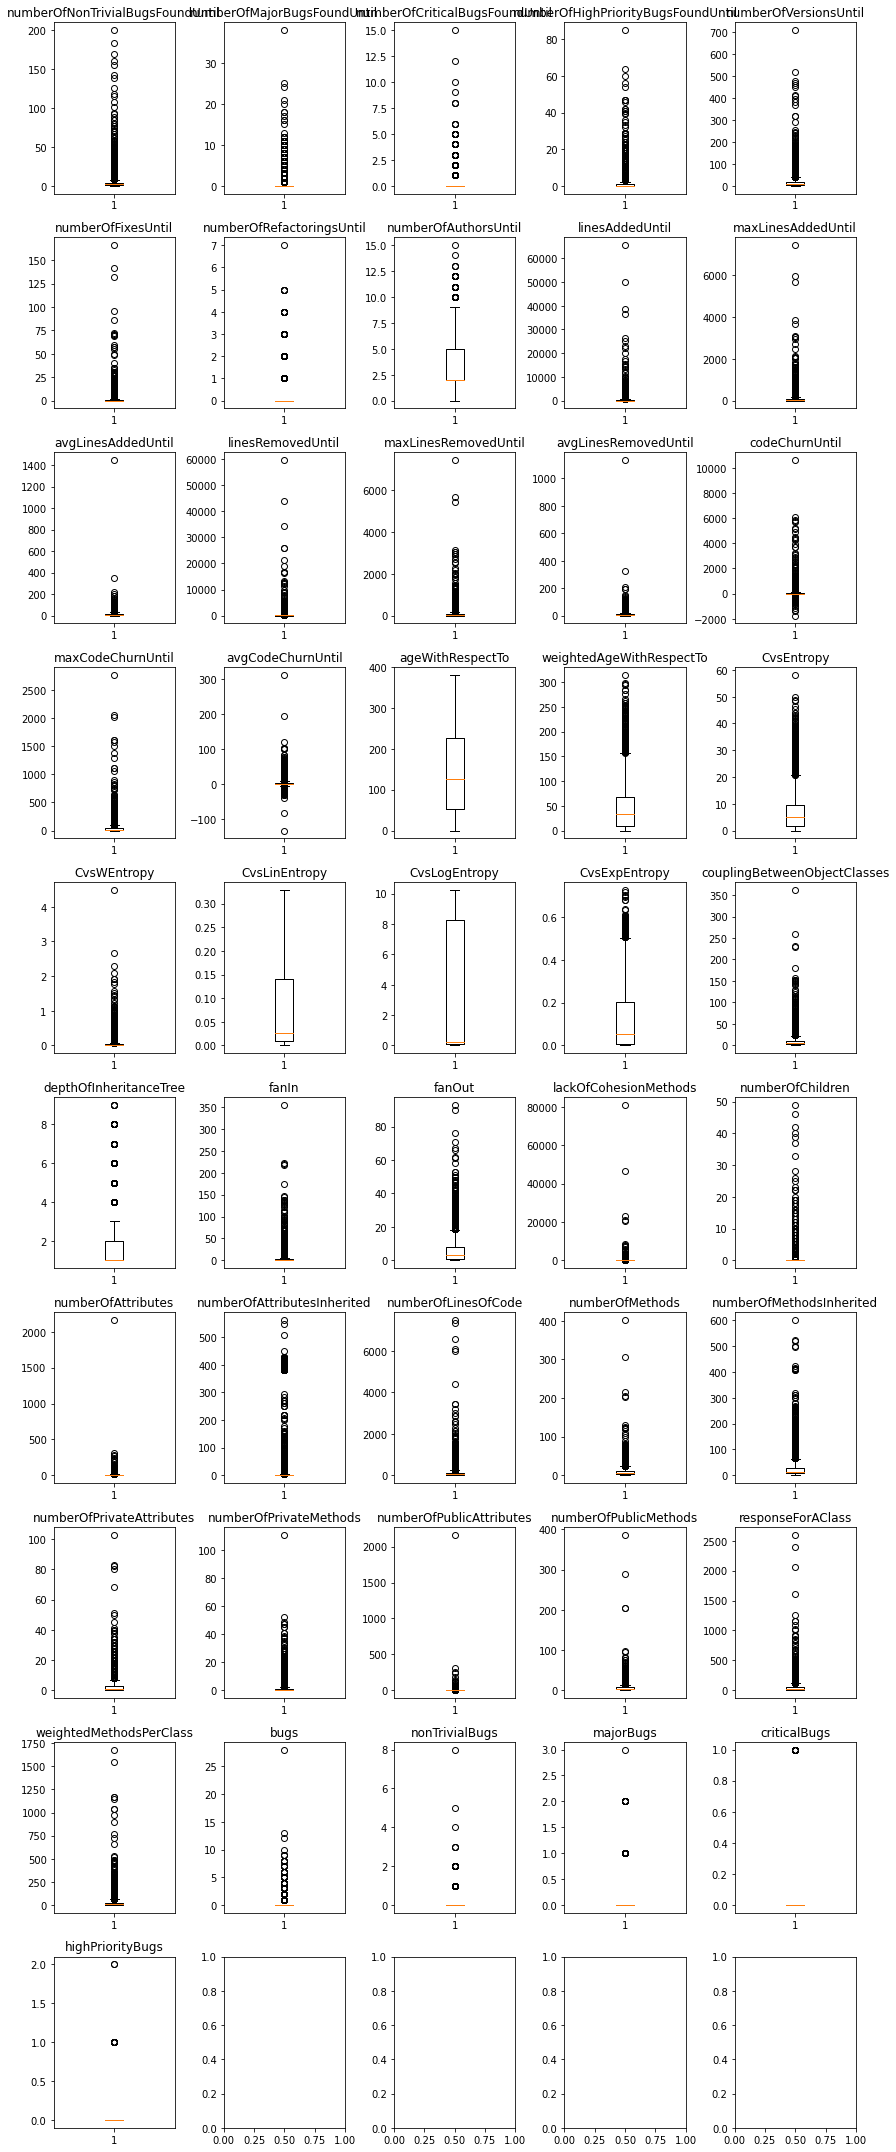

In [13]:
# Print box plots for each variable
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(12, 30))
for i in range(10):
    for j in range(5):
        index = (j + (i * 5)) + 1
        if index < 47:
            ax[i, j].boxplot(metrics.iloc[:,index])
            ax[i, j].set_title(metrics.columns[index])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

It looks like 'bugs' has an outlier around 28. Another thing to note is that 'bugs' has the majority of its data points around 0, which creates an unbalanced dataset and we will have to keep it in mind when performing linear regression. There are a few predictors with possible high leverage points, but again there are many points close to 0 so outliers/high leverage points appear more frequent. We can look at a few scatter plots with our selected subset of predictors to visualize the effect of this outlier.

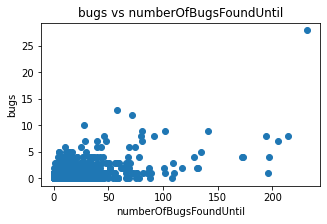

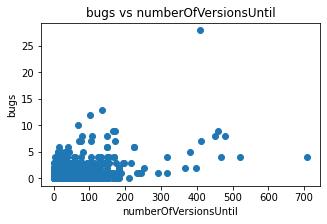

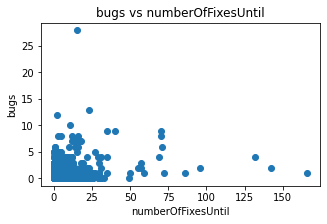

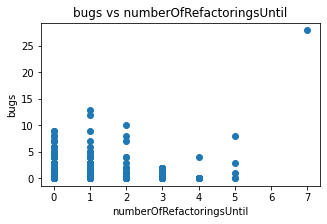

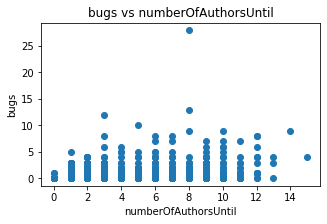

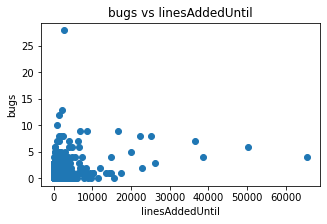

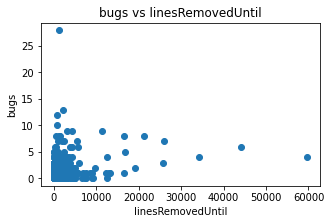

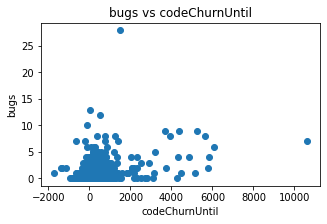

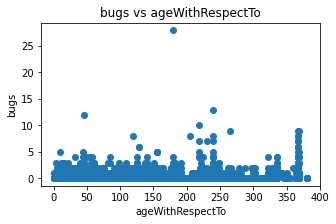

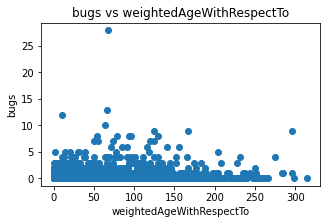

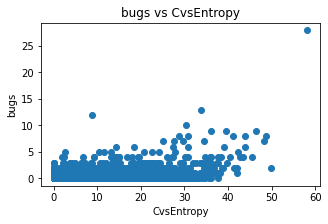

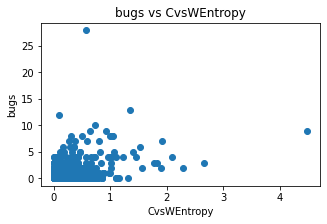

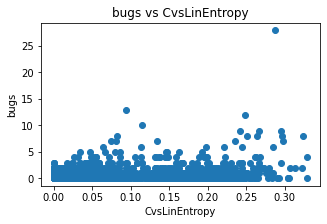

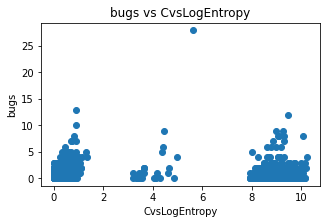

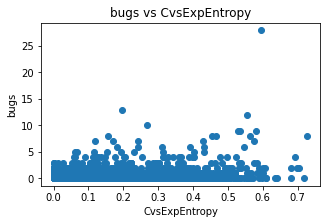

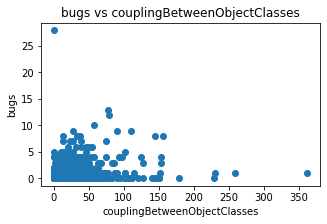

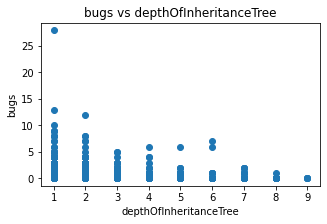

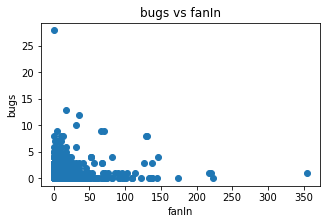

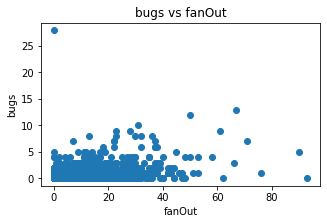

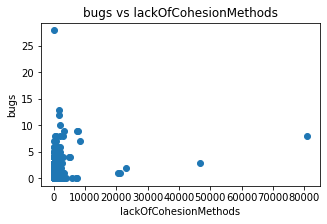

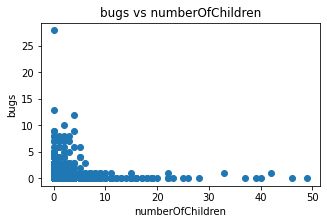

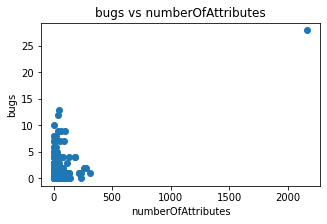

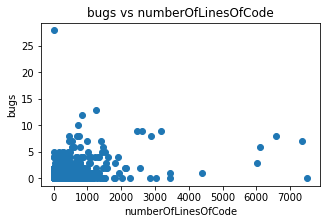

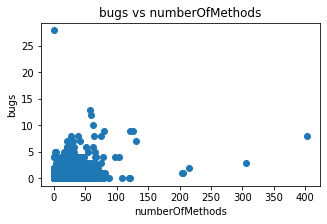

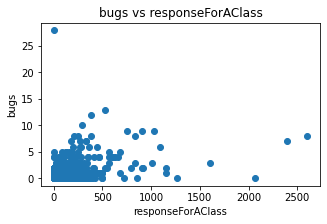

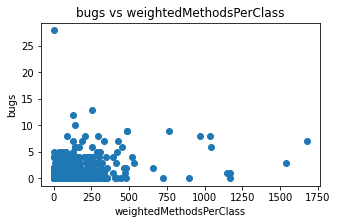

In [14]:
# create scatterplots 
for col in subset:
    plt.figure(figsize=(5, 3))
    plt.scatter( metrics[col], metrics['bugs'])
    plt.title(f'bugs vs {col}')
    plt.xlabel(col)
    plt.ylabel('bugs')
    plt.show()

The 'bugs' outlier is certainly prevalant in each of the plots above, so it may be ideal to remove this point in the future. In addition, we can see that this point also acts as a high leverage point for numberOfAttributes. This information, coupled with low lines of code metrics, suggests that this outlier is not an accurate representation of the data (if so few lines of code are being changed, how are so many attributes being added). Let's go ahead and remove it.

In [15]:
metrics = metrics[metrics['bugs'] <= 25]

Now, let's look at some basic regression and residuals.

In [16]:
def get_resid(X, Y):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_x_squared = np.sum(X ** 2)

    num = (n * sum_xy) - (sum_x * sum_y)
    denom = (n * sum_x_squared) - (sum_x ** 2)

    b_1 = num / denom
    b_0 = (sum_y - (b_1 * sum_x)) / n

    pred = (b_1 * X) + b_0

    residuals = Y - pred

    return b_1, b_0, residuals



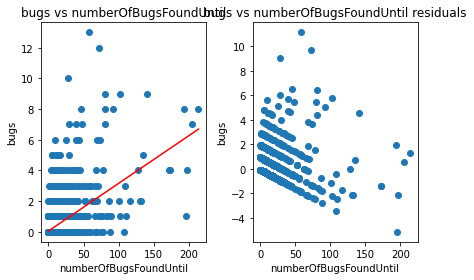

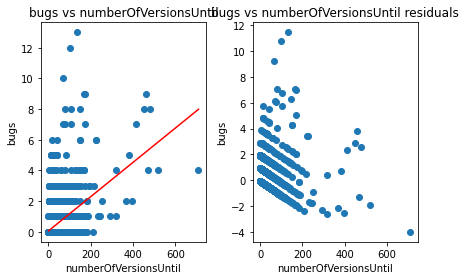

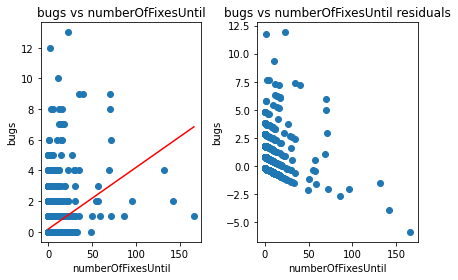

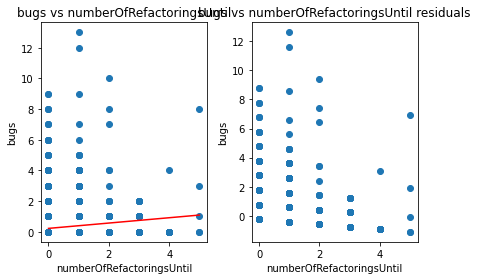

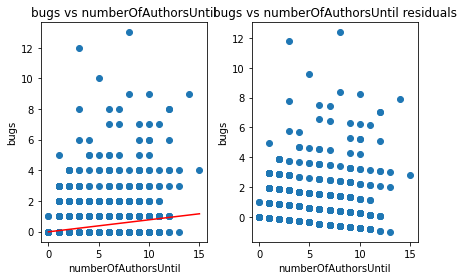

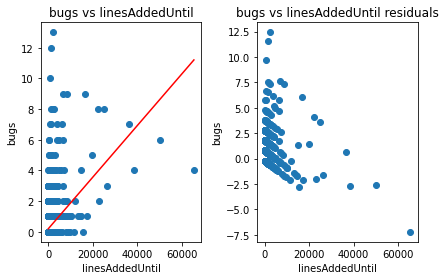

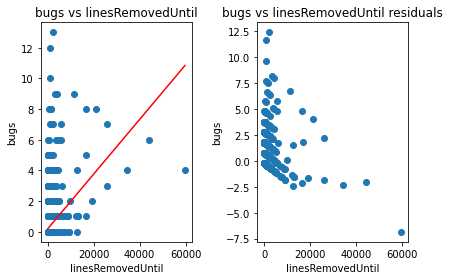

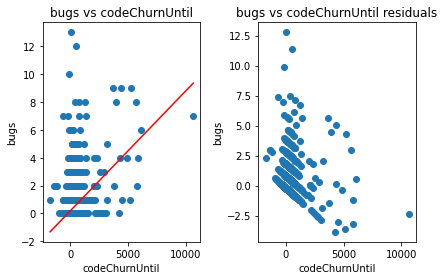

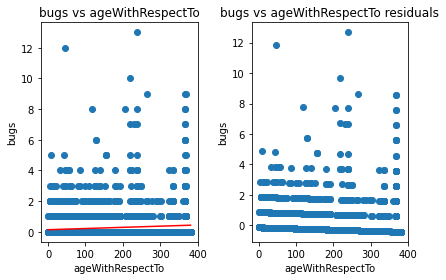

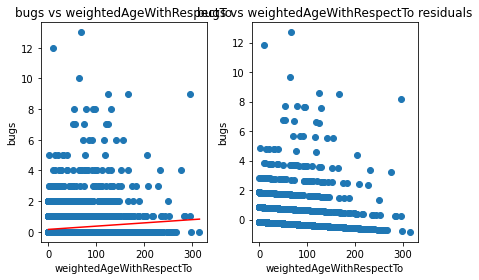

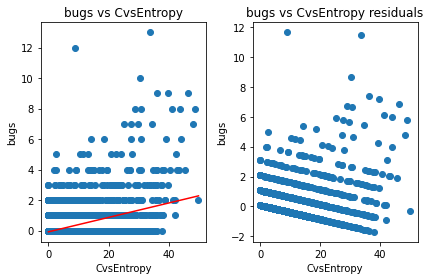

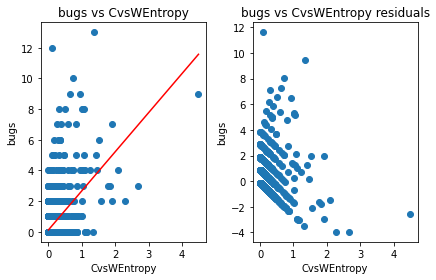

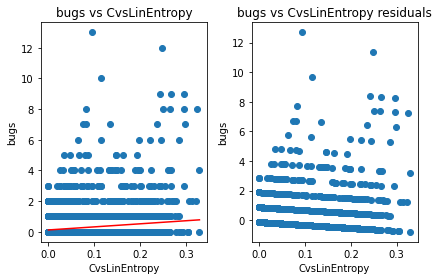

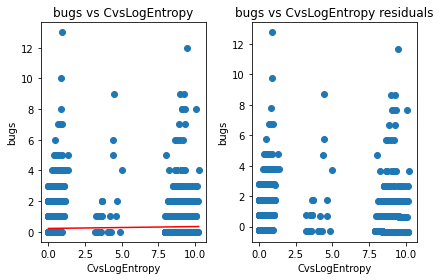

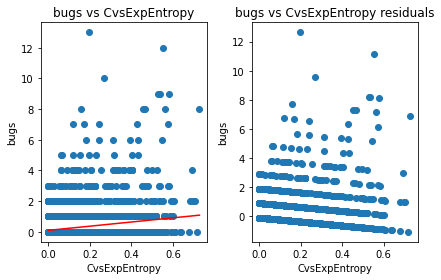

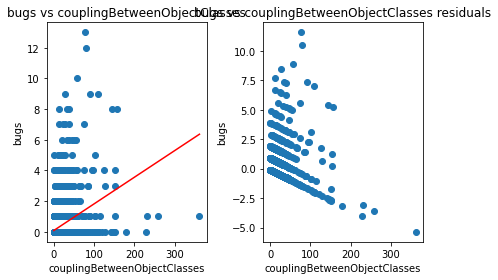

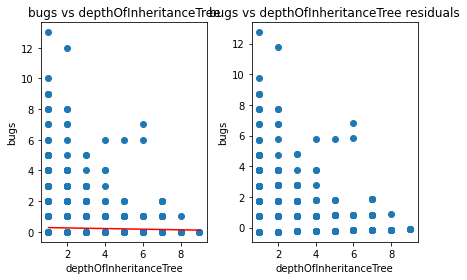

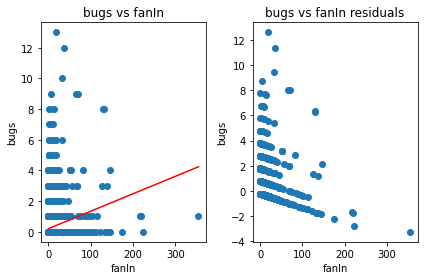

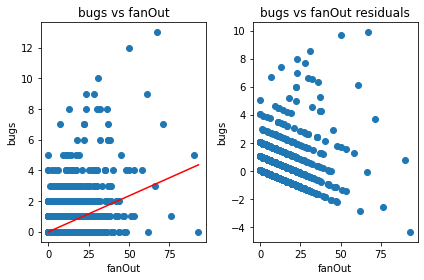

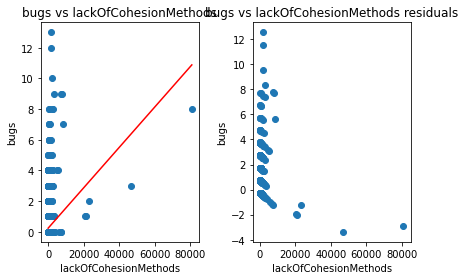

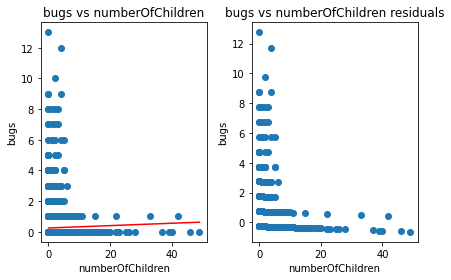

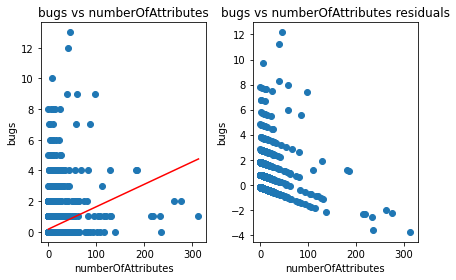

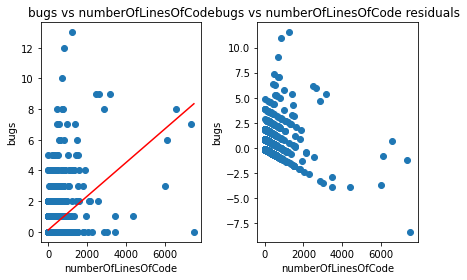

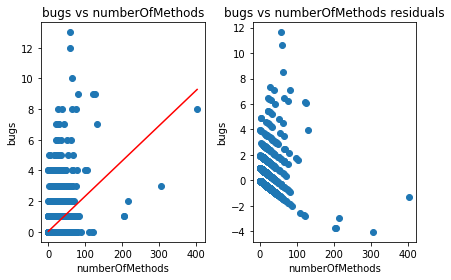

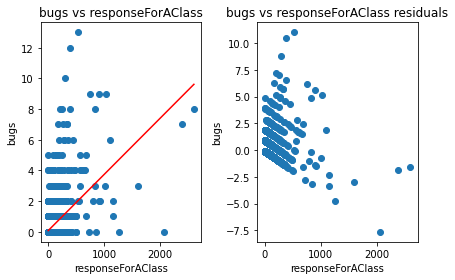

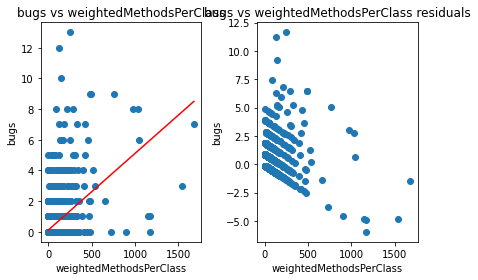

In [17]:
# print scatter with regression line and residuals for all selected predictors
for predictor in subset:
    b_1, b_0, residuals = get_resid(metrics[predictor], metrics['bugs'])

    plt.subplot(1, 2, 1)
    plt.scatter( metrics[predictor], metrics['bugs'])

    # add regression line (y = b_0 + b_1 * x or y = mx + b)
    x_vals = np.linspace(min(metrics[predictor]), max(metrics[predictor]), 100)
    y_vals = b_0 + (b_1 * x_vals)
    plt.plot(x_vals, y_vals, color='red')

    plt.title(f'bugs vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('bugs')

    plt.subplot(1, 2, 2)
    plt.scatter( metrics[predictor], residuals)
    plt.title(f'bugs vs {predictor} residuals')
    plt.xlabel(predictor)
    plt.ylabel('bugs')

    plt.tight_layout()

    plt.show()

Based on these residual plots, not of the predictors have especially strong residual patterns with the bugs data. There is no noticable correlation of error terms, nor non-constant variance.

Now it is easier to see some patterns in the data. Then, let's look at a quick scatter matrix of the predictor variables to see what correlations they have.

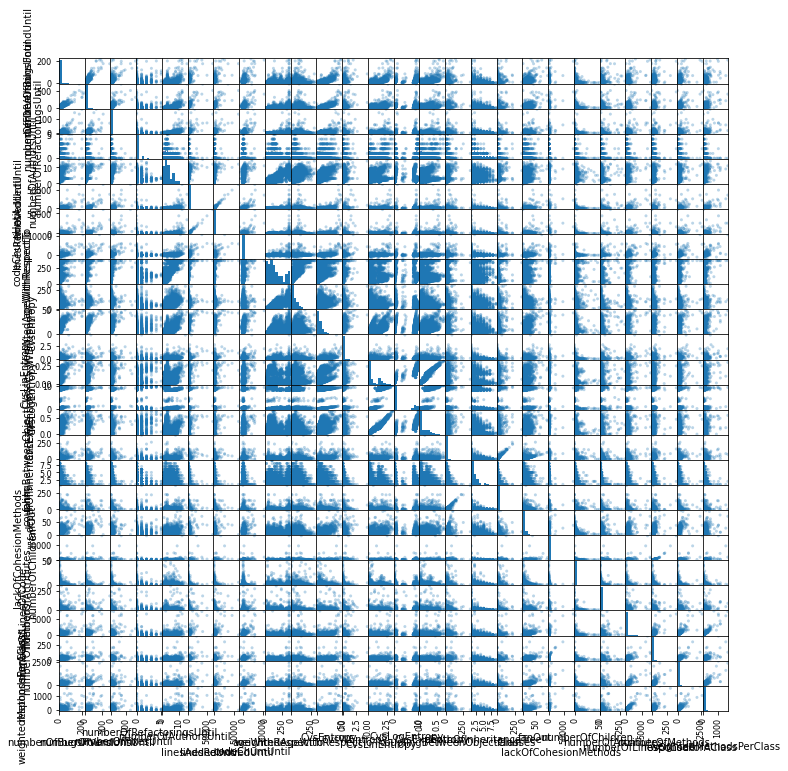

In [18]:
pd.plotting.scatter_matrix(metrics[subset], alpha=0.3, figsize=(12, 12));

This is difficult to see with so many variables, but here are a new predictor variables that may have concern for colinearity.

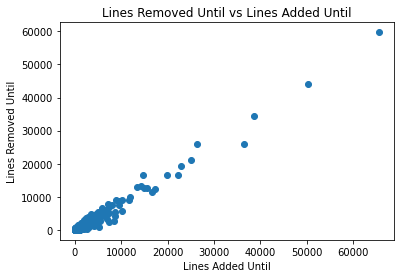

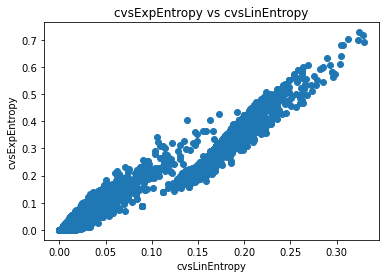

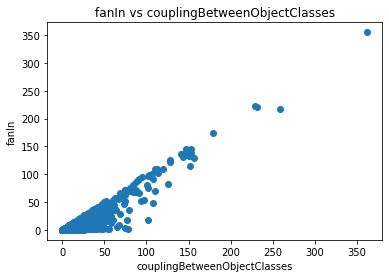

In [20]:
plt.figure()
plt.scatter( metrics['linesAddedUntil'], metrics['linesRemovedUntil'])
plt.title(f'Lines Removed Until vs Lines Added Until')
plt.xlabel('Lines Added Until')
plt.ylabel('Lines Removed Until')
plt.show()

plt.figure()
plt.scatter( metrics['CvsLinEntropy'], metrics['CvsExpEntropy'])
plt.title(f'cvsExpEntropy vs cvsLinEntropy')
plt.xlabel('cvsLinEntropy')
plt.ylabel('cvsExpEntropy')
plt.show()

plt.figure()
plt.scatter( metrics['couplingBetweenObjectClasses'], metrics['fanIn'])
plt.title(f'fanIn vs couplingBetweenObjectClasses')
plt.xlabel('couplingBetweenObjectClasses')
plt.ylabel('fanIn')
plt.show()

We can also look at the correlation matrix to get a better idea of which parameters may be colinear.

In [30]:
# Print correlation matrix
metrics.corr()

,numberOfBugsFoundUntil,numberOfNonTrivialBugsFoundUntil,numberOfMajorBugsFoundUntil,numberOfCriticalBugsFoundUntil,numberOfHighPriorityBugsFoundUntil,numberOfVersionsUntil,numberOfFixesUntil,numberOfRefactoringsUntil,numberOfAuthorsUntil,linesAddedUntil,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,responseForAClass,weightedMethodsPerClass,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs
numberOfBugsFoundUntil,1.000000,0.956033,0.783071,0.658792,0.556409,0.868936,0.616201,0.277755,0.369650,0.669021,...,0.378043,0.138455,0.396072,0.623127,0.617488,0.497651,0.246312,0.236951,0.159279,0.200117
numberOfNonTrivialBugsFoundUntil,0.956033,1.000000,0.837039,0.698857,0.327647,0.903011,0.699550,0.163315,0.452087,0.732227,...,0.387722,0.148501,0.409721,0.658939,0.678307,0.531976,0.170521,0.251232,0.176690,0.139699
numberOfMajorBugsFoundUntil,0.783071,0.837039,1.000000,0.855386,0.260398,0.764745,0.522211,0.108138,0.347659,0.611767,...,0.301992,0.098565,0.344158,0.546837,0.583105,0.471060,0.138438,0.299603,0.222005,0.124732
numberOfCriticalBugsFoundUntil,0.658792,0.698857,0.855386,1.000000,0.261122,0.657231,0.441993,0.099927,0.298526,0.542533,...,0.200609,0.077571,0.325956,0.460712,0.494675,0.394579,0.101706,0.236797,0.172299,0.111406
numberOfHighPriorityBugsFoundUntil,0.556409,0.327647,0.260398,0.261122,1.000000,0.268866,0.001787,0.455370,-0.079542,0.084026,...,0.082471,-0.021666,0.135917,0.147623,0.078759,0.123797,0.317591,0.062651,0.033015,0.272923
numberOfVersionsUntil,0.868936,0.903011,0.764745,0.657231,0.268866,1.000000,0.711350,0.125672,0.607649,0.760428,...,0.321936,0.134680,0.420036,0.609292,0.620011,0.463048,0.135465,0.233815,0.170075,0.092378
numberOfFixesUntil,0.616201,0.699550,0.522211,0.441993,0.001787,0.711350,1.000000,-0.021367,0.482218,0.680727,...,0.183789,0.164841,0.302394,0.431613,0.493123,0.298312,0.052347,0.077106,0.059757,0.024279
numberOfRefactoringsUntil,0.277755,0.163315,0.108138,0.099927,0.455370,0.125672,-0.021367,1.000000,-0.053796,0.025716,...,0.083671,0.002606,0.085816,0.114740,0.046975,0.113361,0.150041,0.020680,0.008947,0.081366
numberOfAuthorsUntil,0.369650,0.452087,0.347659,0.298526,-0.079542,0.607649,0.482218,-0.053796,1.000000,0.343957,...,0.159188,0.064404,0.221614,0.305775,0.324989,0.236038,-0.039692,0.120499,0.064481,-0.010317
linesAddedUntil,0.669021,0.732227,0.611767,0.542533,0.084026,0.760428,0.680727,0.025716,0.343957,1.000000,...,0.306044,0.152848,0.369941,0.578047,0.636391,0.375246,0.084388,0.171808,0.115681,0.031719


In [31]:
# Make a list of correlations
corr_list = metrics.corr().unstack()
corr_list = corr_list[corr_list != 1]

# Sort correlations in descending order
sorted_corr = pd.Series(np.abs(np.sort(corr_list.values)[::-1]))
sorted_corr = sorted_corr.drop_duplicates()
for corr in sorted_corr:
    print(corr_list[corr_list == corr])

linesAddedUntil    linesRemovedUntil    0.986991
linesRemovedUntil  linesAddedUntil      0.986991
dtype: float64
CvsLinEntropy  CvsExpEntropy    0.969282
CvsExpEntropy  CvsLinEntropy    0.969282
dtype: float64
numberOfBugsFoundUntil            numberOfNonTrivialBugsFoundUntil    0.956033
numberOfNonTrivialBugsFoundUntil  numberOfBugsFoundUntil              0.956033
dtype: float64
maxLinesAddedUntil    maxLinesRemovedUntil    0.949846
maxLinesRemovedUntil  maxLinesAddedUntil      0.949846
dtype: float64
CvsLinEntropy  CvsLogEntropy    0.943642
CvsLogEntropy  CvsLinEntropy    0.943642
dtype: float64
numberOfLinesOfCode      weightedMethodsPerClass    0.93269
weightedMethodsPerClass  numberOfLinesOfCode        0.93269
dtype: float64
avgLinesAddedUntil    avgLinesRemovedUntil    0.913721
avgLinesRemovedUntil  avgLinesAddedUntil      0.913721
dtype: float64
numberOfNonTrivialBugsFoundUntil  numberOfVersionsUntil               0.903011
numberOfVersionsUntil             numberOfNonTrivialBugs

There are a few highly-correlated predictor variables here, so we will likely need to perform PCA and identify a set of independent principle components to use in the model. We can also look at correlations with just bugs to get an idea of the relationships between the predictors and the response variable.

In [32]:
# Print correlation between each column and graduation rate
bugs_corr = {}
for column in metrics.columns:
    if (column != 'bugs') and pd.api.types.is_numeric_dtype(metrics[column]):
        print("bugs vs. " + column + ": " + str(metrics['bugs'].corr(metrics[column])))
        bugs_corr[column] = metrics['bugs'].corr(metrics[column])

bugs vs. numberOfBugsFoundUntil: 0.4976506403034481
bugs vs. numberOfNonTrivialBugsFoundUntil: 0.5319759627779972
bugs vs. numberOfMajorBugsFoundUntil: 0.4710598168367139
bugs vs. numberOfCriticalBugsFoundUntil: 0.39457860486077834
bugs vs. numberOfHighPriorityBugsFoundUntil: 0.12379683982782105
bugs vs. numberOfVersionsUntil: 0.4630476907275827
bugs vs. numberOfFixesUntil: 0.29831201109948
bugs vs. numberOfRefactoringsUntil: 0.11336079864796322
bugs vs. numberOfAuthorsUntil: 0.23603787277566293
bugs vs. linesAddedUntil: 0.37524550905022147
bugs vs. maxLinesAddedUntil: 0.32930849010132607
bugs vs. avgLinesAddedUntil: 0.1435312564070864
bugs vs. linesRemovedUntil: 0.3421139755036526
bugs vs. maxLinesRemovedUntil: 0.3027874981823443
bugs vs. avgLinesRemovedUntil: 0.11803501697921219
bugs vs. codeChurnUntil: 0.3956194928924587
bugs vs. maxCodeChurnUntil: 0.32145660483353206
bugs vs. avgCodeChurnUntil: 0.1167398994903036
bugs vs. ageWithRespectTo: 0.1090535006691864
bugs vs. weightedAgeWit

In [33]:
# Print the list again, sorted
for key in sorted(bugs_corr, key=bugs_corr.get, reverse=True):
    print(key + ":" + str(bugs_corr[key]))


numberOfNonTrivialBugsFoundUntil:0.5319759627779972
numberOfBugsFoundUntil:0.4976506403034481
CvsWEntropy:0.4939793028753249
numberOfMajorBugsFoundUntil:0.4710598168367139
responseForAClass:0.46547111872338937
numberOfVersionsUntil:0.4630476907275827
fanOut:0.4387964369755558
weightedMethodsPerClass:0.4345815085390261
nonTrivialBugs:0.4215568457895357
numberOfLinesOfCode:0.4205780082744366
CvsEntropy:0.41820658154235174
majorBugs:0.4056035018427272
codeChurnUntil:0.3956194928924587
numberOfCriticalBugsFoundUntil:0.39457860486077834
numberOfMethods:0.39021830019447995
linesAddedUntil:0.37524550905022147
linesRemovedUntil:0.3421139755036526
couplingBetweenObjectClasses:0.33665501482217125
maxLinesAddedUntil:0.32930849010132607
maxCodeChurnUntil:0.32145660483353206
numberOfPrivateMethods:0.3188885501353244
maxLinesRemovedUntil:0.3027874981823443
numberOfFixesUntil:0.29831201109948
numberOfPublicMethods:0.27622670472024546
numberOfAttributes:0.24632651416501655
numberOfAuthorsUntil:0.23603

In [34]:
# save cleaned data to csv
metrics.to_csv('./dataset/cleaned_metrics.csv')